In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.offline as py
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from src import config

py.init_notebook_mode(connected=True)
from scipy.misc import imread

color = sns.color_palette()
with open(config.stopwords_path, encoding='utf-8') as f:
    for line in f:
        STOPWORDS.add(line.strip())
print("stopwrod size:", len(STOPWORDS))

<script type="text/javascript">
        window.PlotlyConfig = {MathJaxConfig: 'local'};
        if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}
        if (typeof require !== 'undefined') {
        require.undef("plotly");
        requirejs.config({
            paths: {
                'plotly': ['https://cdn.plot.ly/plotly-latest.min']
            }
        });
        require(['plotly'], function(Plotly) {
            window._Plotly = Plotly;
        });
        }
        </script>

stopwrod size: 2085


In [23]:
df_all = pd.read_pickle(config.ngram_feature_path)
print('df_all.shape: ', df_all.shape)

df_all.shape:  (42471, 8)


In [25]:
df_all.head()

,id,text,label,type,text_unigram,text_bigram,text_trigram,text_unigram_str
0,09766d6ec92a9eff7f8763f9f9fee14f,＂李的76人律师团领队、法律大学副校长张爱国教授对媒体表示，李天一因第一个与被害女子发生性关...,1,train,"[＂, 李, 的, 76, 人, 律师团, 领队, 、, 法律, 大学, 副校长, 张, 爱...","[＂_李, 李_的, 的_76, 76_人, 人_律师团, 律师团_领队, 领队_、, 、_...","[＂_李_的, 李_的_76, 的_76_人, 76_人_律师团, 人_律师团_领队, 律师...",＂ 李 的 76 人 律师团 领队 、 法律 大学 副校长 张 爱国 教授 对 媒体 表示 ...
1,1cdf439752d339b45fc848984c609899,【男子捏造“周浦滴滴司机砍死乘客”谣言被刑拘称只是觉得好玩】,0,train,"[【, 男子, 捏造, “, 周浦, 滴滴, 司机, 砍死, 乘客, ”, 谣言, 被, 刑...","[【_男子, 男子_捏造, 捏造_“, “_周浦, 周浦_滴滴, 滴滴_司机, 司机_砍死,...","[【_男子_捏造, 男子_捏造_“, 捏造_“_周浦, “_周浦_滴滴, 周浦_滴滴_司机,...",【 男子 捏造 “ 周浦 滴滴 司机 砍死 乘客 ” 谣言 被 刑拘 称 只是 觉得 好玩 】
2,d3aa07cc41ab42fa5c8718bd655abb1c,【善良的大桥】金沙江大桥在没车行走的时候自我坍塌，这桥通人性，未伤一车一人，太善良了。应该当...,1,train,"[【, 善良, 的, 大桥, 】, 金沙江, 大桥, 在, 没车, 行走, 的, 时候, 自...","[【_善良, 善良_的, 的_大桥, 大桥_】, 】_金沙江, 金沙江_大桥, 大桥_在, ...","[【_善良_的, 善良_的_大桥, 的_大桥_】, 大桥_】_金沙江, 】_金沙江_大桥, ...",【 善良 的 大桥 】 金沙江 大桥 在 没车 行走 的 时候 自我 坍塌 ， 这桥通 人性...
3,e940e98292b76024dfbcbcff378c9d2f,幼儿园都发通知了，家长们注意啦：现在得白血病的小孩越来越多，妇幼保健院提示您，请不要给宝宝喝...,1,train,"[幼儿园, 都, 发, 通知, 了, ，, 家长, 们, 注意, 啦, ：, 现在, 得, ...","[幼儿园_都, 都_发, 发_通知, 通知_了, 了_，, ，_家长, 家长_们, 们_注意...","[幼儿园_都_发, 都_发_通知, 发_通知_了, 通知_了_，, 了_，_家长, ，_家长...",幼儿园 都 发 通知 了 ， 家长 们 注意 啦 ： 现在 得 白血病 的 小孩 越来越 多...
4,21b667ed6784407bf5562a400c72bb3f,上海4000吨垃圾偷倒苏州太湖西山岛(图)（分享自@新浪新闻）,0,train,"[上海, 4000, 吨, 垃圾, 偷倒, 苏州, 太湖, 西山, 岛, (, 图, ), ...","[上海_4000, 4000_吨, 吨_垃圾, 垃圾_偷倒, 偷倒_苏州, 苏州_太湖, 太...","[上海_4000_吨, 4000_吨_垃圾, 吨_垃圾_偷倒, 垃圾_偷倒_苏州, 偷倒_苏...",上海 4000 吨 垃圾 偷倒 苏州 太湖 西山 岛 ( 图 ) （ 分享 自 @ 新浪 新闻 ）


In [26]:
df_all['text_length'] = df_all['text'].str.len()

In [28]:
df_tr = df_all.loc[df_all['type'] == 'train']
df_te = df_all.loc[df_all['type'] == 'test']
print('df_tr.shape: ', df_tr.shape)

df_tr.shape:  (38471, 9)


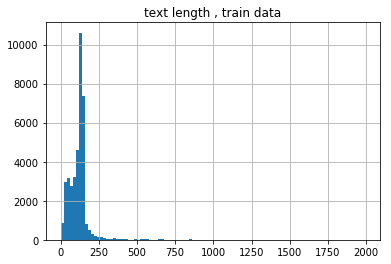

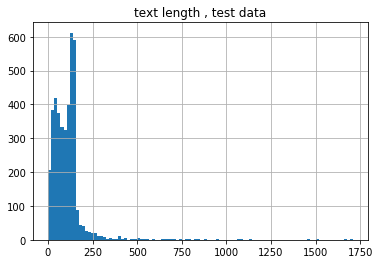

In [39]:
df_tr['text_length'].hist(bins=100)
plt.title('text length , train data')
plt.show()

df_te['text_length'].hist(bins=100)
plt.title('text length , test data')
plt.show()

In [11]:
# check the class distribution for the author label in train
print(df_tr['label'].value_counts())

1    19285
0    19186
Name: label, dtype: int64


                                 id                            text  label  \
1  1cdf439752d339b45fc848984c609899  【男子捏造“周浦滴滴司机砍死乘客”谣言被刑拘称只是觉得好玩】      0   

    type                                       text_unigram  \
1  train  [【, 男子, 捏造, “, 周浦, 滴滴, 司机, 砍死, 乘客, ”, 谣言, 被, 刑...   

                                         text_bigram  \
1  [【_男子, 男子_捏造, 捏造_“, “_周浦, 周浦_滴滴, 滴滴_司机, 司机_砍死,...   

                                        text_trigram  \
1  [【_男子_捏造, 男子_捏造_“, 捏造_“_周浦, “_周浦_滴滴, 周浦_滴滴_司机,...   

                                  text_unigram_str  text_length  
1  【 男子 捏造 “ 周浦 滴滴 司机 砍死 乘客 ” 谣言 被 刑拘 称 只是 觉得 好玩 】           30  
count    19186.000000
mean       122.840040
std        124.258744
min          1.000000
25%         66.000000
50%        117.000000
75%        142.000000
max       1994.000000
Name: text_length, dtype: float64


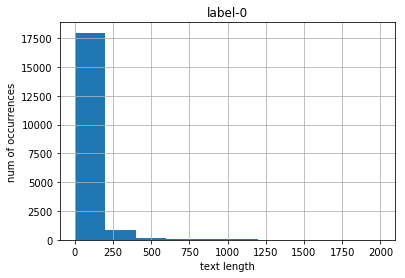

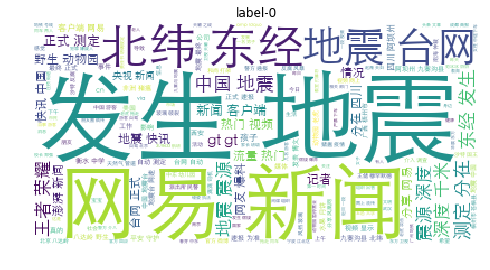

                                 id  \
0  09766d6ec92a9eff7f8763f9f9fee14f   

                                                text  label   type  \
0  ＂李的76人律师团领队、法律大学副校长张爱国教授对媒体表示，李天一因第一个与被害女子发生性关...      1  train   

                                        text_unigram  \
0  [＂, 李, 的, 76, 人, 律师团, 领队, 、, 法律, 大学, 副校长, 张, 爱...   

                                         text_bigram  \
0  [＂_李, 李_的, 的_76, 76_人, 人_律师团, 律师团_领队, 领队_、, 、_...   

                                        text_trigram  \
0  [＂_李_的, 李_的_76, 的_76_人, 76_人_律师团, 人_律师团_领队, 律师...   

                                    text_unigram_str  text_length  
0  ＂ 李 的 76 人 律师团 领队 、 法律 大学 副校长 张 爱国 教授 对 媒体 表示 ...          112  
count    19285.000000
mean       119.166969
std         66.455243
min          1.000000
25%         94.000000
50%        130.000000
75%        141.000000
max       1688.000000
Name: text_length, dtype: float64


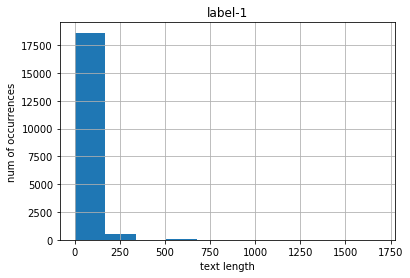

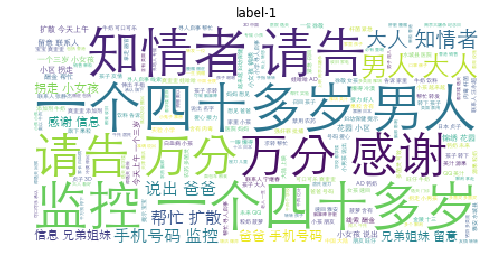

In [14]:
for lbl in [0, 1]:
    df_tr_label = df_tr.loc[df_tr['label'] == lbl]
    print(df_tr_label.iloc[:1])
    label_len = df_tr_label['text_length']
    print(label_len.describe())
    plt.figure()
    label_len.hist()
    plt.title('label-' + str(lbl))
    plt.xlabel('text length')
    plt.ylabel('num of occurrences')
    plt.show()
    
    text = ''
    for i in df_tr_label['text_unigram_str']:
        text += i
    wc = WordCloud(background_color='white',  # 设置背景颜色
                   stopwords=STOPWORDS,  # 设置停用词
                   font_path='/System/Library/Fonts/STHeiti Light.ttc',
                   )
    wc.generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wc)
    plt.title('label-' + str(lbl))
    plt.axis('off')
    plt.show()

In [16]:
print(df_tr.label.value_counts())

1    19285
0    19186
Name: label, dtype: int64
